# Lesson 06 Notes: Joukowski Transformation

In [1]:
import math
import numpy
from matplotlib import pyplot
# embed figures into the notebook
%matplotlib inline
%run ./definitions.ipynb

# 1. Complex Numbers in Python

In [2]:
a = 3
b = 3
z = a + b + 1j
print('z = ', z)
print('The type of the variable is ', type(z))

z =  (6+1j)
The type of the variable is  <class 'complex'>


### Exercises for HW 2

In [3]:
a = 2.75 + 3.69j
b = 8.55 - 6.13j
answer1 = a * b

answer2 = 1.4 * numpy.exp(5.32j)

c = 7.51 - 9.15j
d = 4.43 + 9.64j

answer3 = c / d

print('Answer 1: ', answer1)
print('Answer 2: ', answer2)
print('Answer 3: ', answer3)

Answer 1:  (46.1322+14.692000000000004j)
Answer 2:  (0.799270785858-1.1494199454j)
Answer 3:  (-0.4880897698448308-1.0033441577191493j)


# 2. Shapes created by the Joukowski transformation

(-3, 3)

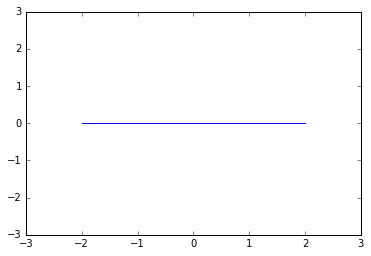

In [4]:
r = 1
c = 1
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta))+(r*numpy.sin(theta)*1j)
xi1 = zcirc + c**2/(zcirc)
xi = xi1
pyplot.plot(xi.real,xi.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

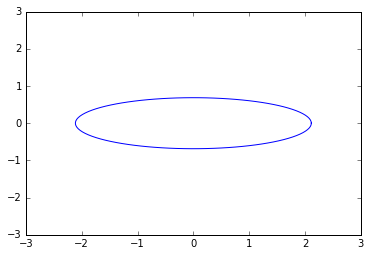

In [5]:
r = 1.4
c = 1
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta))+(r*numpy.sin(theta)*1j)
zeta2 = zcirc + c**2/(zcirc)
zeta = zeta2
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

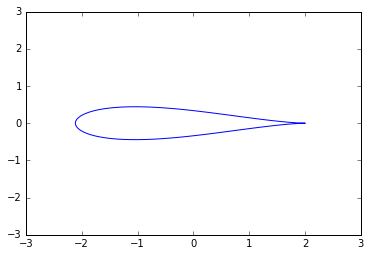

In [6]:
r = 1.2
c = 1
xc, yc = c-r,0
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta) + xc)+((r*numpy.sin(theta) + yc)*1j)
zeta3 = zcirc + c**2/(zcirc)
zeta = zeta3
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

(-3, 3)

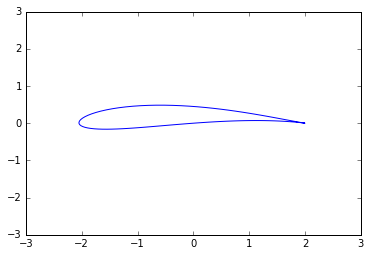

In [7]:
xc, yc = -0.1,0.1
c = 1
r = numpy.sqrt((c+xc)**2+yc**2)
theta = numpy.linspace(0,2*numpy.pi,100)
zcirc = (r*numpy.cos(theta) - xc)+((r*numpy.sin(theta) + yc)*1j)
zeta4 = zcirc + c**2/(zcirc)
zeta = zeta4
pyplot.plot(zeta.real,zeta.imag)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)

# 3. Grid points on the $z$-plane using polar coordinates

50


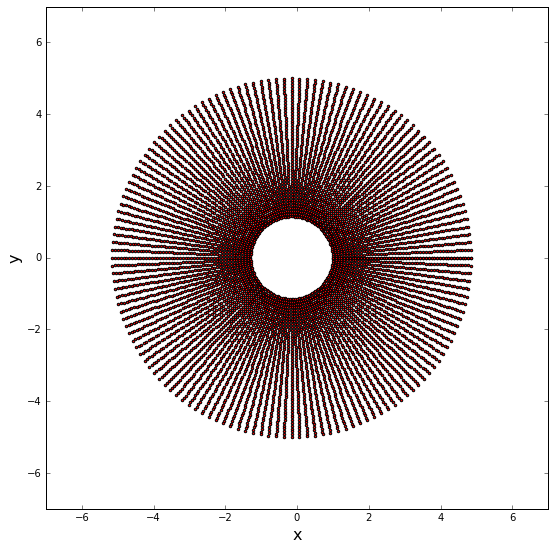

In [8]:
r1 = numpy.linspace(1.15,5,50)
#r2 = -1*r1
#r = numpy.concatenate((r1,r2),axis=0)
r = r1
print(numpy.size(r))
theta = numpy.linspace(0,2*numpy.pi,145)
c = 1

R, THETA = numpy.meshgrid(r,theta)
xc = -0.15
yc = 0

zcirc = (R*numpy.cos(THETA) + xc)+((R*numpy.sin(THETA) + yc)*1j)

size = 9
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-7,7)
pyplot.ylim(-7,7)
pyplot.scatter(zcirc.real,zcirc.imag,s=6,c='r')

(-6, 6)

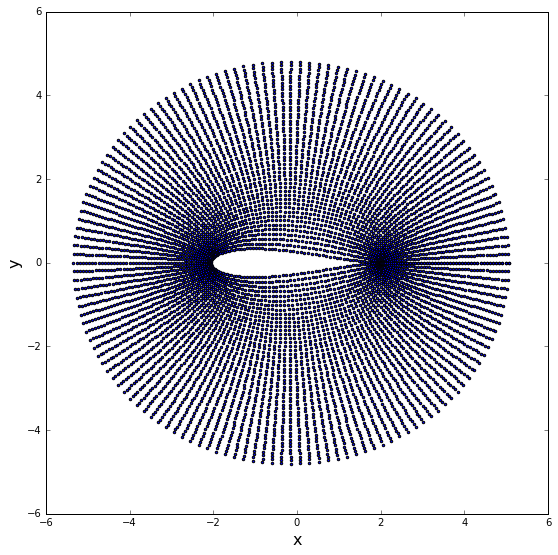

In [9]:
xi = zcirc + c**2/(zcirc)

size = 9
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-7,7)
pyplot.ylim(-7,7)
pyplot.scatter(xi.real,xi.imag,s=6,c='b')
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)

# 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

## Homework Questions

1. What is the strength of the doublet?

2. What is the velocity ($u$-component, $v$-component) at 62th point on the airfoil surface? Assume we index the trailing edge as the 1st point and index the points counterclockwise.

3. What is the minimum value of the pressure coefficient on the airfoil surface?



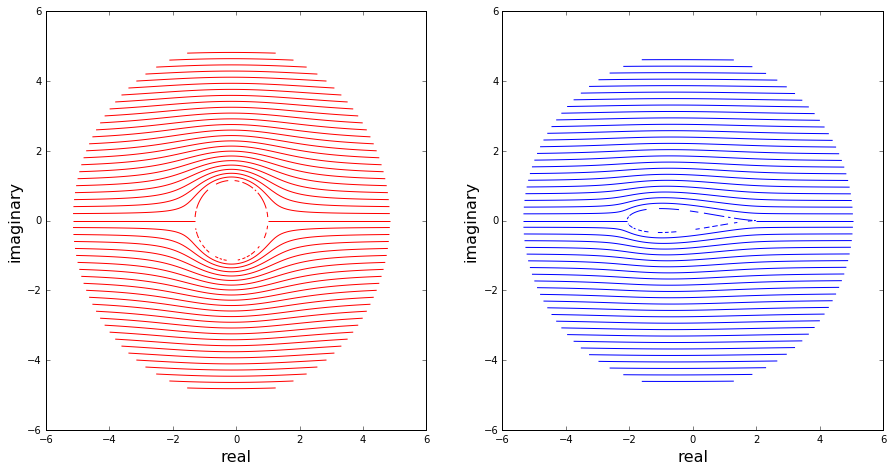

In [10]:
radius = 1.15
uinf = 1
vinf = 0
xd = -0.15
yd = 0

k = (radius**2)*(2*numpy.pi*uinf)

psid = getstreamfuncdub(k,xd,yd,zcirc.real,zcirc.imag)
psifs = uinf*zcirc.imag
psi = psid + psifs

levels = numpy.linspace(-psi.max(),psi.max(),51)

size = 5
pyplot.figure(figsize=(3*size,1.5*size))
pyplot.subplot(121)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.contour(zcirc.real, zcirc.imag, psi, levels=levels, colors='r', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.contour(xi.real, xi.imag, psi, levels=levels, colors='b', linewidths=1, linestyles='solid');

In [11]:
# 1. Strength of doublet
print('k = ' + str(k))

k = 8.309512568745001


\begin{equation}
W_\xi = u_\xi - iv_\xi = \frac{d F}{d \xi} = \frac{d F}{d z}\times\frac{d z}{d \xi} = \frac{d F}{d z}/\frac{d \xi}{d z} = (u_z-iv_z) / \frac{d \xi}{d z}
\end{equation}

And

\begin{equation}
\frac{d \xi}{d z} = \frac{d (z + c^2/z)}{dz} = 1 - \left(\frac{c}{z}\right)^2
\end{equation}

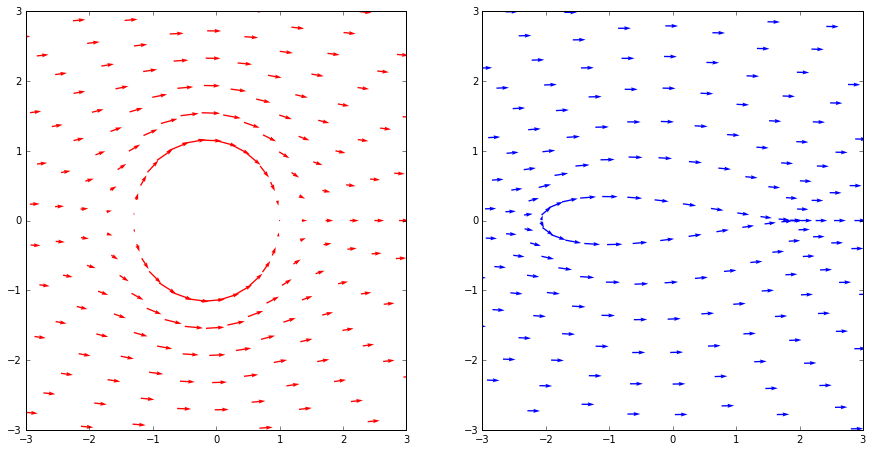

In [31]:
ud, vd = getveldub(k,xd,yd,zcirc.real,zcirc.imag)
ufs = uinf*numpy.ones(numpy.shape(zcirc.real))
vfs = numpy.zeros(numpy.shape(zcirc.imag))

u = ud + ufs
v = vd + vfs

p = 5
size = 5
pyplot.figure(figsize=(3*size,1.5*size))
pyplot.subplot(121)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.quiver(zcirc.real[::p, ::p],zcirc.imag[::p, ::p],u[::p, ::p],v[::p, ::p],pivot='mid',units='inches',color='r')

W = (u - v*1j)/(1-(c/zcirc)**2)
u2 = W.real
v2 = -1*W.imag

pyplot.subplot(122)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.quiver(xi.real[::p, ::p],xi.imag[::p, ::p],u2[::p, ::p],v2[::p, ::p],pivot='mid',units='inches',color='b')

In [13]:
# 2. Velocity at 62th point on surface

print('u = ' + str(u2[61,0]))
print('v = ' + str(v2[61,0]))

u = 1.10633846629
v = 0.523633349298


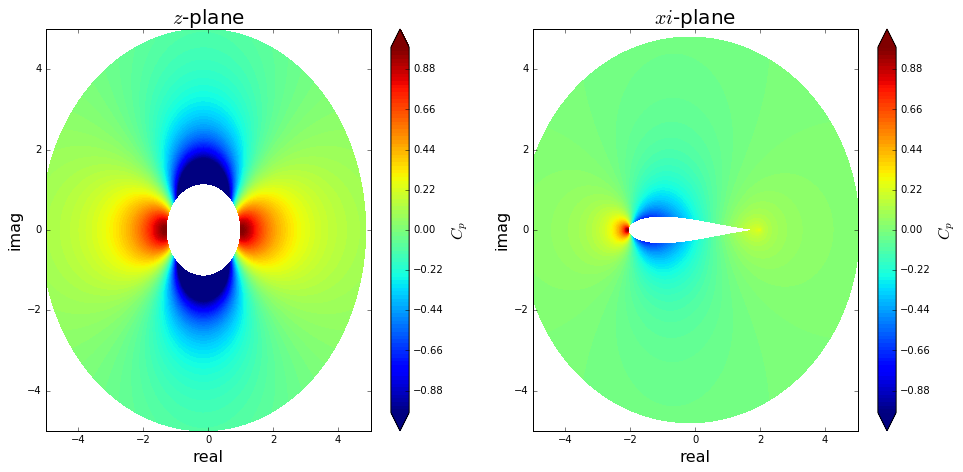

In [54]:
# z plane
cp = 1.0 - (u**2+v**2)/uinf**2

# plot the pressure coefficient field
size = 8
pyplot.figure(figsize=(2*size, 0.9*size))
pyplot.subplot(121)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imag', fontsize=16)
pyplot.title('$z$-plane', fontsize=20)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(zcirc.real, zcirc.imag, cp, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44, -0.22, 0.00, 0.22, 0.44, 0.66, 0.88])

# xi plane
cp2 = 1.0 - (u2**2+v2**2)/uinf**2

pyplot.subplot(122)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imag', fontsize=16)
pyplot.title('$xi$-plane', fontsize=20)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(xi.real, xi.imag, cp2, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44, -0.22, 0.00, 0.22, 0.44, 0.66, 0.88])

In [15]:
# 3. minimum value of Cp on airfoil surface

cp2min = numpy.amin(cp2[:,0])
print(cp2min)

-0.687755674092


# 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

## Homework Questions

* Write Python code to obtain the figures as shown above. Set the angle of attack as $AoA=20^\circ$.
* Answer the following questions:
    1. Do you think the flow over the airfoil we obtained here is reasonable? Why or why not?
    2. Where are the stagnation points on the airfoil? Assume we index the trailing edge as the 1<sup>st</sup> point and index the points counterclockwise.
    3. How much is the lift?
    4. How much is the drag?
    5. What is the velocity at the 50<sup>th</sup> point on the airfoil surface? 
    6. What is the pressure coefficient at the 75<sup>th</sup> point on the airfoil surface?


Numerical answers in the auto-graded homework in our [Open edX course](http://openedx.seas.gwu.edu/courses/GW/MAE6226/2014_spring/about) need to be entered with two digits after the decimal point.

\begin{equation}
z'=\left[ z-(x_c+iy_c) \right]e^{-i\times AoA}
\end{equation}


Explicitly expressed in $x$, $y$, $x'$, and $y'$:

\begin{equation}
\left\{
\begin{array}{l}
x' = (x-x_c)\cos(AoA) + (y-y_c)\sin(AoA) \\
y' = - (x-x_c)\sin(AoA) + (y-y_c)\cos(AoA)
\end{array}
\right.
\end{equation}


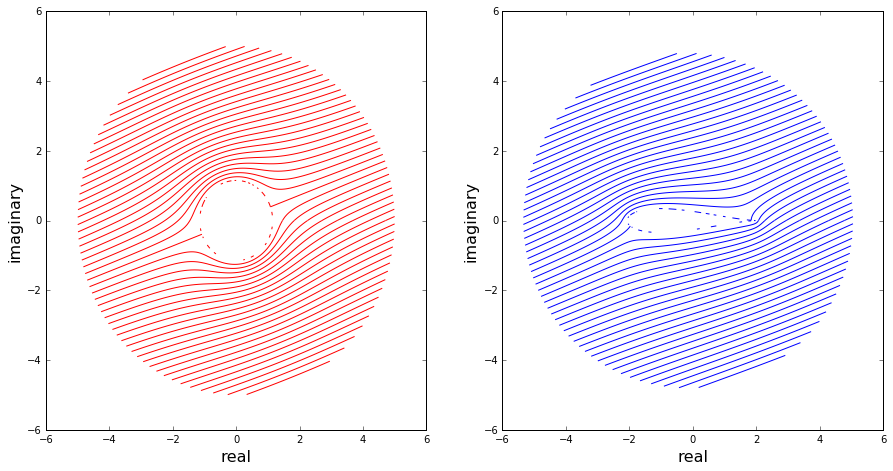

In [60]:
aoa = math.radians(20)

xc = 0
yc = 0
uinf = 1
vinf = 0
zcirc = (R*numpy.cos(THETA) + xc)+((R*numpy.sin(THETA) + yc)*1j)
x = zcirc.real
y = zcirc.imag

xprime = ((x - xc)*numpy.cos(aoa)) + ((y - yc)*numpy.sin(aoa))
yprime = (-1*(x - xc)*numpy.sin(aoa)) + ((y - yc)*numpy.cos(aoa))

zprime = xprime + yprime*1j
xiprime = zprime + c**2/zprime


psid = getstreamfuncdub(k,xc,yc,xprime,yprime)
psifs = uinf*zprime.imag
psi = psid + psifs

levels = numpy.linspace(-psi.max(),psi.max(),51)

size = 5
pyplot.figure(figsize=(3*size,1.5*size))
pyplot.subplot(121)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.contour(zcirc.real, zcirc.imag, psi, levels=levels, colors='r', linewidths=1, linestyles='solid')

pyplot.subplot(122)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('imaginary',fontsize=16)
pyplot.contour(xi.real, xi.imag, psi, levels=levels, colors='b', linewidths=1, linestyles='solid');

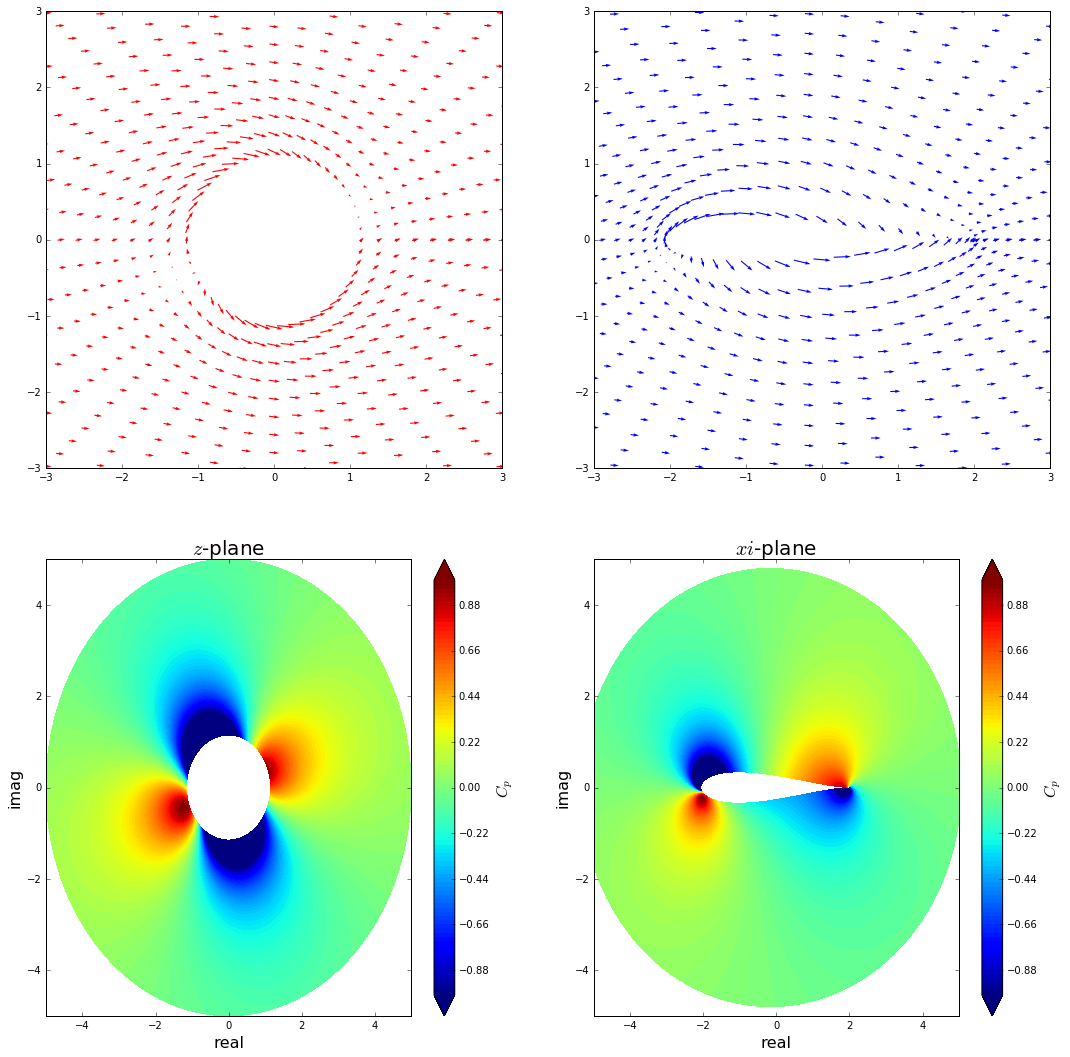

In [75]:
ud, vd = getveldub(k,xd,yd,xprime,yprime)
ufs = uinf*numpy.ones(numpy.shape(xprime))
vfs = numpy.zeros(numpy.shape(yprime))

uprime = ud + ufs
vprime = vd + vfs

velprime = uprime + vprime*1j
vel = (velprime.real - velprime.imag*1j)*numpy.exp(-1j*aoa)
u = vel.real
v = vel.imag

p = 3
size = 9
pyplot.figure(figsize=(2*size,2*size))
pyplot.subplot(221)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.quiver(zcirc.real[::p, ::p],zcirc.imag[::p, ::p],uprime[::p, ::p],vprime[::p, ::p],pivot='mid',units='inches',color='r')

pyplot.subplot(222)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.quiver(xi.real[::p, ::p],xi.imag[::p, ::p],uprime[::p, ::p],vprime[::p, ::p],pivot='mid',units='inches',color='b')


# z plane
cp = 1.0 - (u**2+v**2)/uinf**2

# plot the pressure coefficient field

pyplot.subplot(223)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imag', fontsize=16)
pyplot.title('$z$-plane', fontsize=20)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(zcirc.real, zcirc.imag, cp, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44, -0.22, 0.00, 0.22, 0.44, 0.66, 0.88])

# xi plane
cp2 = 1.0 - (u2**2+v2**2)/uinf**2

pyplot.subplot(224)
pyplot.xlabel('real', fontsize=16)
pyplot.ylabel('imag', fontsize=16)
pyplot.title('$xi$-plane', fontsize=20)
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
contf = pyplot.contourf(xi.real, xi.imag, cp2, levels=numpy.linspace(-1.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.88, -0.66, -0.44, -0.22, 0.00, 0.22, 0.44, 0.66, 0.88])